In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:\\Users\\T Ganesh\\mlprojects\\data\\stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.columns.dtype

dtype('O')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [10]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [13]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [17]:
df['parental_level_of_education']=le.fit_transform(df['parental_level_of_education'])

In [18]:
x=df.drop('math_score',axis=1)
y=df['math_score']

In [19]:
x.shape

(1000, 7)

In [20]:
x.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [21]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [22]:
x=preprocessor.fit_transform(x)

In [23]:
x.shape

(1000, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   int64 
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape

(800, 13)

In [27]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [28]:
def evaluate_model(true,predicted):

    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    score=r2_score(true,predicted)
    return mae,rmse,score
    

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
model_r2_scores =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    model_r2_scores.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3581
- Mean Absolute Error: 4.3047
- R2 Score: 0.8727
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4209
- Mean Absolute Error: 4.2151
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.3089
- Mean Absolute Error: 4.9979
- R2 Score: 0.8235
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1328
- Mean Absolute Error: 4.8468
- R2 Score: 0.8454


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3583
- Mean Absolute Error: 4.3042
- R2 Score: 0.8726
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4163
- Mean Absolute Error: 4.2108
- R2 Score: 0.8794


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6213
- Mean Absolute Error: 4.5465
- R2 Score: 0.8598
-----------------------

In [30]:
pd.DataFrame(list(zip(model_list, model_r2_scores)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.879443
0,Linear Regression,0.879238
8,AdaBoost Regressor,0.850420
7,CatBoosting Regressor,0.849468
5,Random Forest Regressor,0.848069
1,Lasso,0.845435
6,XGBRegressor,0.827126
3,K-Neighbors Regressor,0.791462
4,Decision Tree,0.711513


In [31]:
lin_model=LinearRegression(fit_intercept=True)
lin=lin_model.fit(x_train,y_train)
yp=lin.predict(x_test)
score=r2_score(y_test,yp)*100
print("%.2f"%score)

87.92


Text(0, 0.5, 'predicted value')

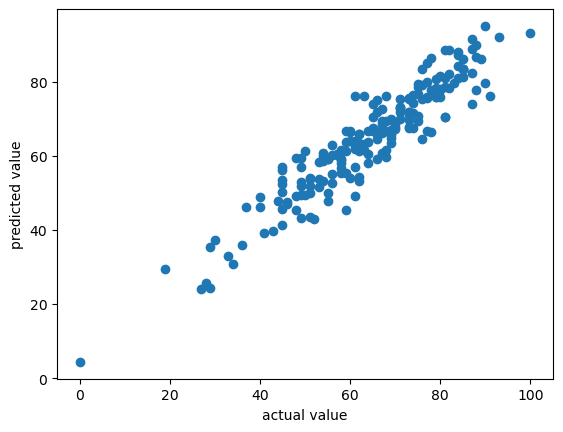

In [32]:
plt.scatter(y_test,yp)
plt.xlabel("actual value")
plt.ylabel("predicted value")

<Axes: xlabel='math_score'>

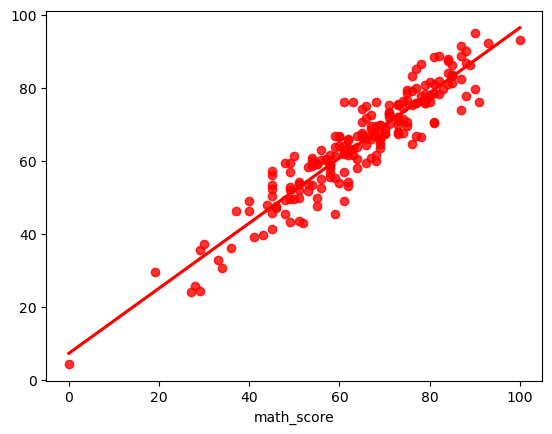

In [33]:
sns.regplot(x=y_test,y=yp,ci=None,color='red')

In [34]:
predicted=pd.DataFrame({'actualvalue':y_test,"predicted":yp,'difference':y_test-yp})
predicted

,actualvalue,predicted,difference
521,91,76.204877,14.795123
737,53,58.399627,-5.399627
740,80,77.743929,2.256071
660,74,76.417187,-2.417187
411,84,87.350202,-3.350202
...,...,...,...
408,52,42.822626,9.177374
332,62,62.269512,-0.269512
208,74,67.506937,6.493063
613,65,66.940080,-1.940080
